In [1]:
# import libraries
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
amino = pd.read_csv("AA & sugars Polemonium.csv")

In [15]:
amino

,pop,LOC,ln_pop_size_2018,freq_of_visit,seed_prod,phase,fru ug/ul,glu ug/ul,sac ug/ul,AAs sum [pmol/uL],...,TRP %,PHE %,ILE %,ORN %,LEU %,LYS %,HYP %,SAR %,PRO %,colors
0,BIA,NE,4.610000,13.4,12.3,M,70.098400,19.662920,63.411520,1751.187429,...,0.50,5.71,2.00,2.91,1.33,3.74,0.0,1.29,4.60,#228B22
1,BIA,NE,4.610000,13.4,12.3,F,138.228000,68.328040,1.913312,195.012100,...,0.00,3.92,2.01,3.63,3.40,10.67,0.0,0.00,0.00,#228B22
2,BOB,N,3.690000,1.0,12.6,M,33.781800,9.704730,6.147660,469.099865,...,0.00,2.91,2.29,2.73,1.06,0.00,0.0,5.00,14.34,#46c4fd
3,BOB,N,3.690000,1.0,12.6,F,124.218000,49.343850,10.057260,148.956264,...,0.00,3.50,2.45,0.00,3.40,1.45,0.0,0.00,0.00,#46c4fd
4,CZL,S,6.210000,5.4,12.0,M,40.299948,20.442720,88.108992,144.522395,...,0.00,9.37,2.69,0.00,8.26,0.00,0.0,0.00,2.40,#e5247e
5,CZL,S,6.210000,5.4,12.0,F,64.434600,33.843372,34.144644,75.786845,...,0.00,4.48,2.16,3.56,0.00,0.00,0.0,0.00,0.00,#e5247e
6,DRO,NE,6.400000,9.1,12.4,M,145.264080,89.213910,332.271300,442.738438,...,0.00,1.90,1.23,2.38,0.00,1.38,0.0,0.00,13.06,#228B22
7,DRO,NE,6.400000,9.1,12.4,F,117.779670,86.876610,172.515270,480.251205,...,0.00,1.61,1.95,2.57,0.00,0.00,0.0,0.00,0.00,#228B22
8,KCZ,N,6.550000,3.0,12.4,M,28.106820,31.836585,147.432540,868.768543,...,0.00,4.86,2.08,4.14,0.79,2.25,0.0,0.55,9.48,#46c4fd
9,KCZ,N,6.550000,3.0,12.4,F,86.393040,84.588828,174.034428,80.838802,...,0.00,3.42,2.49,1.95,3.24,14.62,0.0,0.00,0.00,#46c4fd


In [4]:
amino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 40 columns):
pop                  28 non-null object
LOC                  28 non-null object
ln_pop_size_2018     28 non-null float64
freq_of_visit        28 non-null float64
seed_prod            28 non-null float64
phase                28 non-null object
fru ug/ul            28 non-null float64
glu ug/ul            28 non-null float64
sac ug/ul            28 non-null float64
AAs sum [pmol/uL]    28 non-null float64
ASP %                28 non-null float64
GLU %                28 non-null float64
ASN %                26 non-null float64
SER %                28 non-null float64
GLN %                28 non-null float64
HIS %                17 non-null float64
GLY %                24 non-null float64
THR %                28 non-null float64
CIT %                25 non-null float64
ARG %                28 non-null float64
BALA %               28 non-null float64
ALA %                19 non-null float6

In [5]:
amino.fillna(0, inplace=True)

In [33]:
col = {'NE':'#228B22', 'N':'#46c4fd', 'S':"#e5247e"}#, 'HUM':''}
amino["colors"] = amino.LOC.apply(lambda x: col[x])

In [11]:
np.argmax(amino.seed_prod)

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


24

In [24]:
amino["pop"].loc[24]

'WPN'

In [37]:
amino.freq_of_visit.max()

13.4

In [51]:
amino["pop"].loc[amino.freq_of_visit == amino.freq_of_visit.max()]

0    BIA
1    BIA
Name: pop, dtype: object

/home/kodolamacz/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


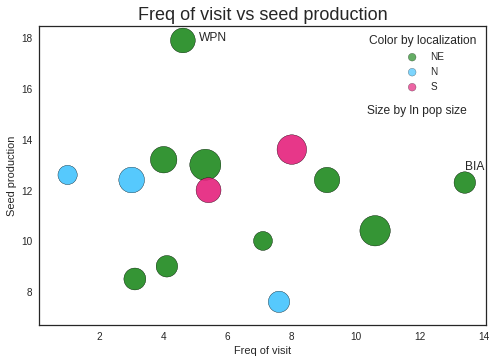

In [62]:
labels =[]
sns.set_style("white")
for key, value in col.items():
    labels.append(key)
    plt.scatter(x = amino.freq_of_visit[amino.LOC == key], y = amino.seed_prod[amino.LOC == key],
            s = np.array(amino.ln_pop_size_2018[amino.LOC == key])*100, 
            c = amino.colors[amino.LOC == key], alpha=0.7, edgecolors='black')

#plt.yscale('log')
#plt.xscale('log') 
plt.xlabel('Freq of visit')
plt.ylabel('Seed production')
plt.title('Freq of visit vs seed production', fontsize=18)
#plt.xlim(0,350)

#plt.xticks([1000,10000,100000], ['1k','10k','100k'])
plt.text(amino.freq_of_visit[np.argmax(amino.seed_prod)]+0.5, amino.seed_prod.max(), amino["pop"].loc[np.argmax(amino.seed_prod)])
plt.text(amino.freq_of_visit.max(), amino.seed_prod[amino.freq_of_visit == amino.freq_of_visit.max()][0]+0.5,
         amino["pop"].loc[amino.freq_of_visit == amino.freq_of_visit.max()][0])
lgnd = plt.legend(labels, title='Color by localization')
for i in range(len(col)):
    lgnd.legendHandles[i]._sizes = [60]

plt.text(10.35,15, "Size by ln pop size")
#plt.scatter(110, 51, s=100, c = 'white', edgecolors='k')
#plt.text(140, 49.8,  r'$0.1 \mu g$')
# Show the plot
plt.show()